In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_validate



from sklearn.model_selection import train_test_split

%matplotlib inline

SEED = 0
from tensorflow.random import set_seed
from numpy.random import seed
seed(SEED)
set_seed(SEED)

print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.4.1


In [3]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv('Data/test.csv')


Text(0.5, 1.0, 'Survival Rate')

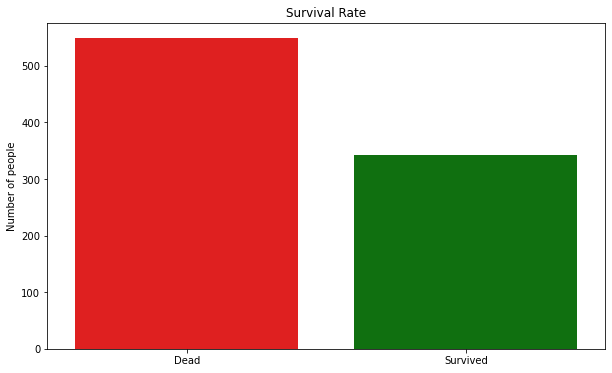

In [5]:
# dead vs survided

fig = plt.figure(figsize = (10,6))
ax=sns.countplot(data=train, x='Survived', palette = ["red","green"])
ax.set_xticklabels(['Dead','Survived'])
ax.set_ylabel('Number of people')
ax.set_xlabel("")
ax.set_title('Survival Rate')

Text(0.5, 1.0, 'Survival Rate by Sex')

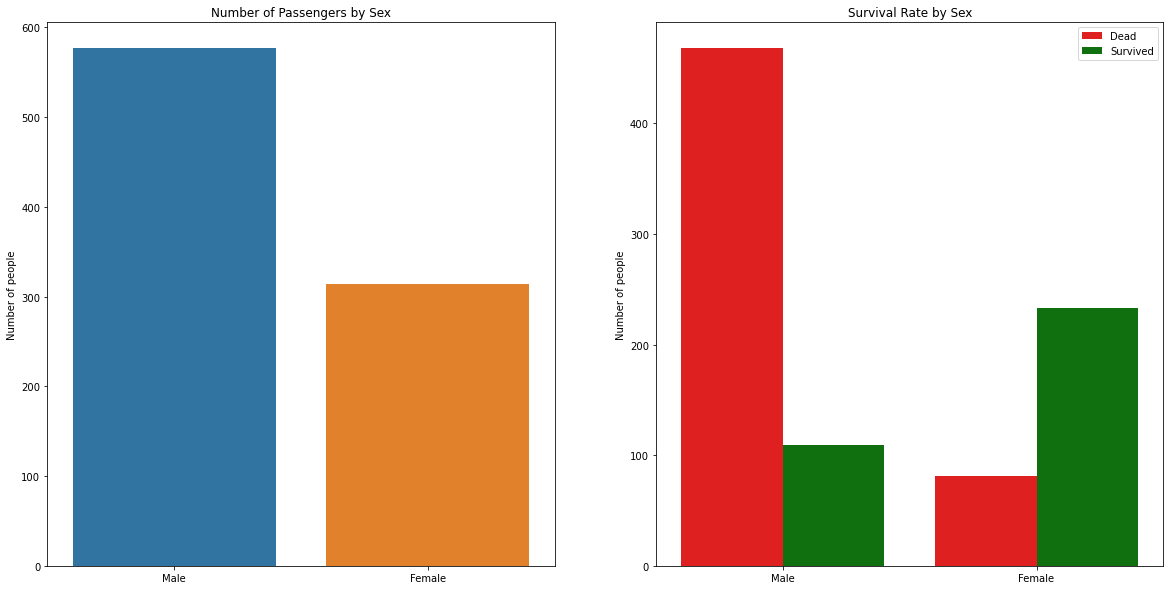

In [11]:
# dead vs survided

f,ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot(ax=ax[0], data=train, x="Sex")
ax[0].set_xticklabels(['Male', 'Female'])
ax[0].set_ylabel('Number of people')
ax[0].set_xlabel("")
ax[0].set_title('Number of Passengers by Sex')

sns.countplot(ax=ax[1], data = train, x="Sex", hue="Survived", palette = ["red","green"])
ax[1].set_xticklabels(['Male', 'Female'])
ax[1].set_ylabel('Number of people')
ax[1].set_xlabel("")
ax[1].legend(['Dead','Survived']) 
ax[1].set_title('Survival Rate by Sex')


Text(0.5, 1.0, 'Survival Rate by Parents / Children Aboard')

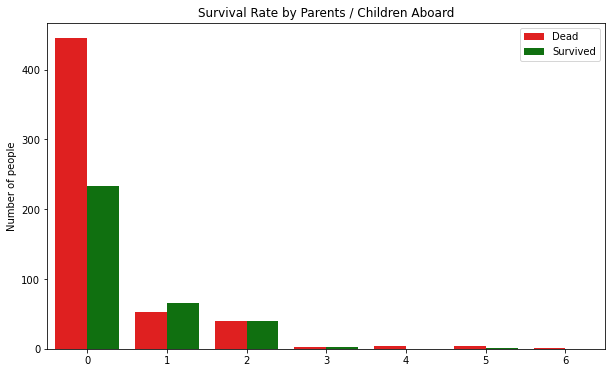

In [13]:
fig = plt.figure(figsize = (10,6))
ax=sns.countplot(data=train, x="Parch", hue="Survived", palette = ["red","green"])
ax.set_ylabel('Number of people')
ax.set_xlabel("")
ax.legend(['Dead','Survived'], loc="upper right") 
ax.set_title('Survival Rate by Parents / Children Aboard')

Text(0.5, 1.0, 'Survival Rate by Number of Siblings')

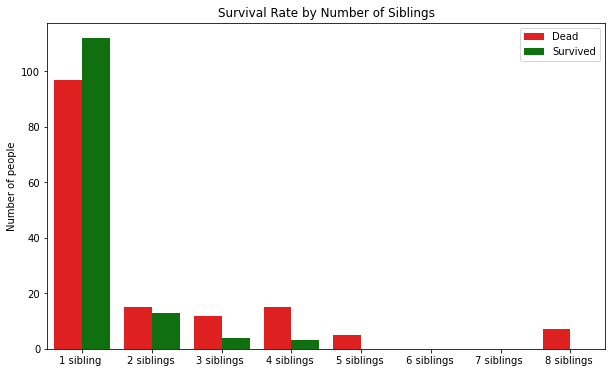

In [15]:
fig = plt.figure(figsize = (10,6))
ax=sns.countplot(data=train, x="SibSp", hue="Survived", palette = ["red","green"], order=[1, 2, 3, 4, 5, 6, 7, 8])
ax.set_xticklabels(['1 sibling ', '2 siblings ', '3 siblings ', '4 siblings ', '5 siblings ', '6 siblings ', '7 siblings ', '8 siblings '])
ax.set_ylabel('Number of people')
ax.set_xlabel("")
ax.legend(['Dead','Survived'], loc="upper right") 
ax.set_title('Survival Rate by Number of Siblings')

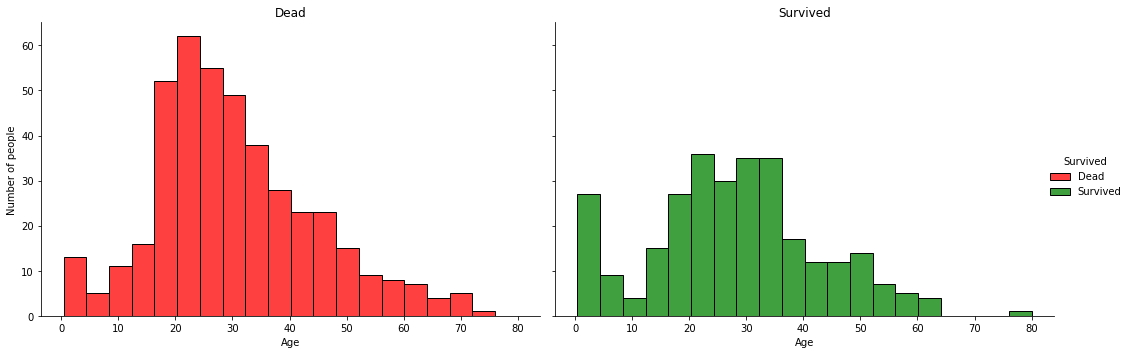

In [19]:
a=sns.displot(data=train, x="Age", hue='Survived', col="Survived", bins=20, multiple="dodge", aspect=1.5, palette = ["red","green"])

for ax, title in zip(a.axes.flat, ['Dead','Survived']):
    ax.set_title(title)

a.set_axis_labels("Age", "Number of people")

a._legend.set_title("Survived")
for t, l in zip(a._legend.texts, ['Dead','Survived']): t.set_text(l)

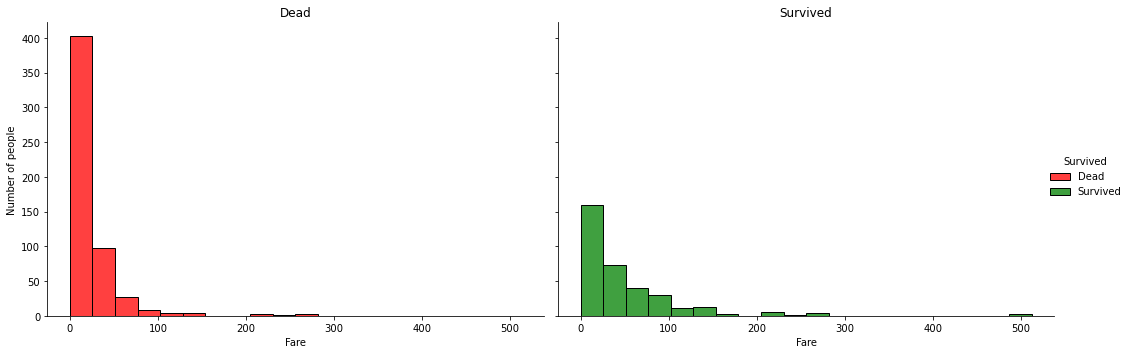

In [21]:
a=sns.displot(data=train, x="Fare", hue='Survived', col="Survived", bins=20, multiple="dodge", aspect=1.5, palette = ["red","green"])

for ax, title in zip(a.axes.flat, ['Dead','Survived']):
    ax.set_title(title)

a.set_axis_labels("Fare", "Number of people")

for t, l in zip(a._legend.texts, ['Dead','Survived']): t.set_text(l)

Text(0.5, 1.0, 'Survival Rate by Class')

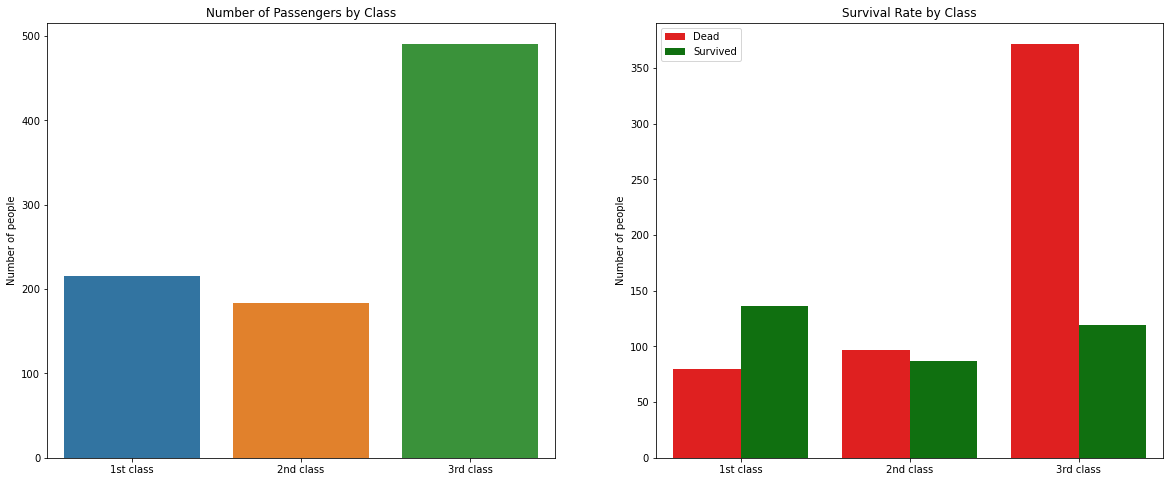

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.countplot(ax=ax[0], data=train, x="Pclass")
ax[0].set_xticklabels(['1st class', '2nd class', '3rd class'])
ax[0].set_ylabel('Number of people')
ax[0].set_xlabel("")
ax[0].set_title('Number of Passengers by Class')

sns.countplot(ax=ax[1], data=train, x="Pclass", hue="Survived", palette = ["red","green"])
ax[1].set_xticklabels(['1st class', '2nd class', '3rd class'])
ax[1].set_ylabel('Number of people')
ax[1].set_xlabel("")
ax[1].legend(['Dead','Survived']) 
ax[1].set_title('Survival Rate by Class')

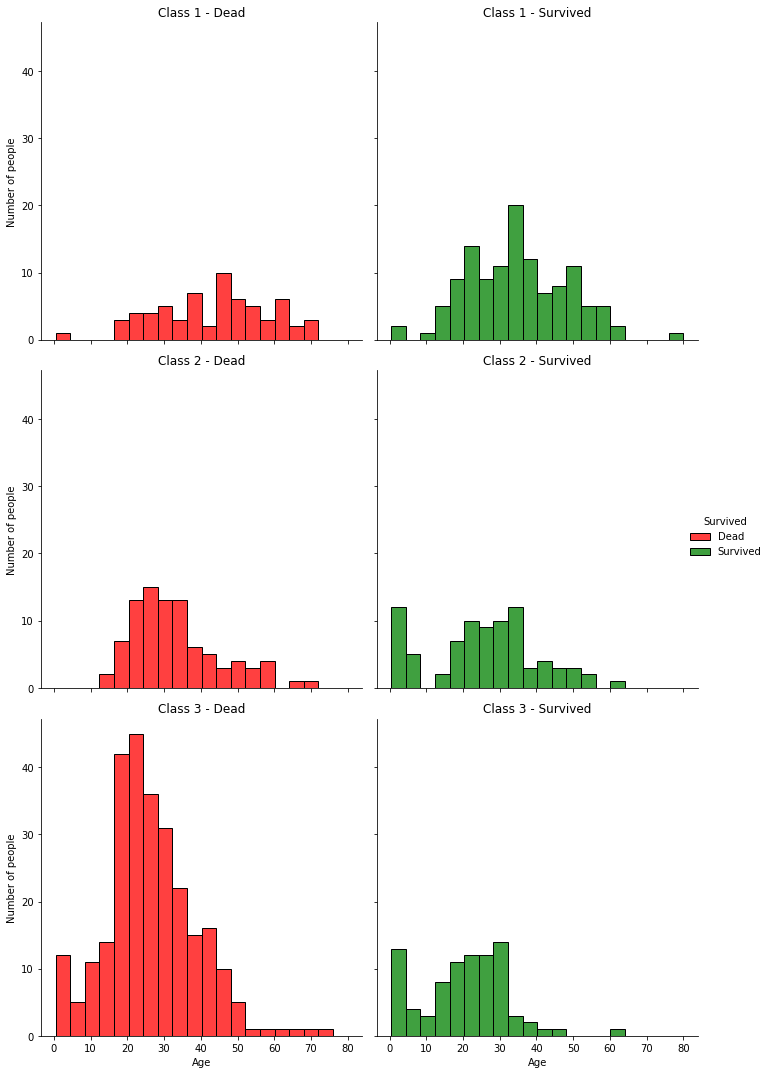

In [27]:
a=sns.displot(data=train, x="Age", hue='Survived', col="Survived", row='Pclass', bins=20, multiple="dodge", palette = ["red","green"])

ax = a.axes.flatten()
ax[0].set_title("Class 1 - Dead")
ax[1].set_title("Class 1 - Survived")
ax[2].set_title("Class 2 - Dead")
ax[3].set_title("Class 2 - Survived")
ax[4].set_title("Class 3 - Dead")
ax[5].set_title("Class 3 - Survived")

a.set_axis_labels("Age", "Number of people")

for t, l in zip(a._legend.texts, ['Dead','Survived']): t.set_text(l)

Text(0.5, 1.0, 'Survival Rate by Embarked')

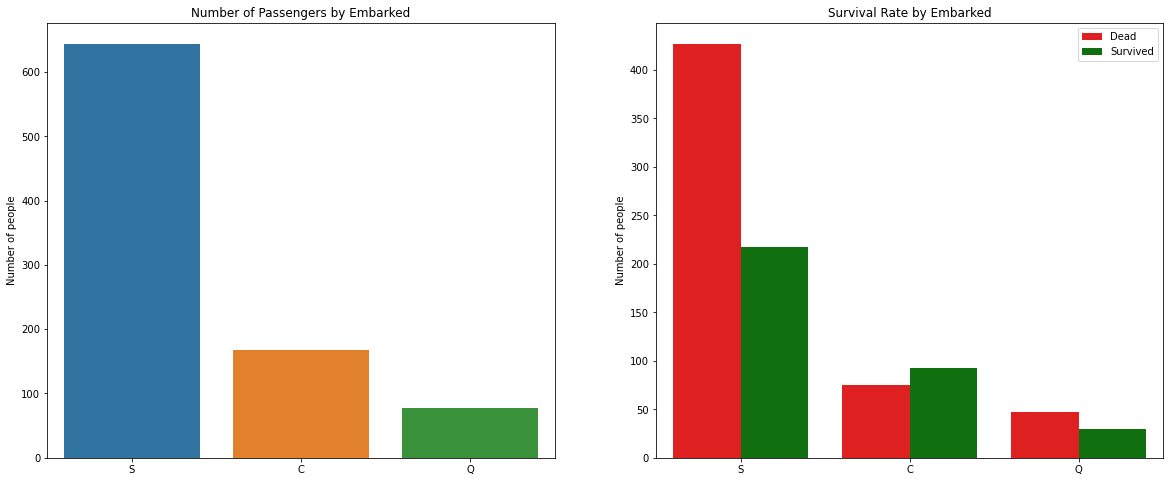

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.countplot(ax=ax[0], data=train, x="Embarked")
ax[0].set_ylabel('Number of people')
ax[0].set_xlabel("")
ax[0].set_title('Number of Passengers by Embarked')

sns.countplot(ax=ax[1], data=train, x="Embarked", hue="Survived", palette = ["red","green"])
ax[1].set_ylabel('Number of people')
ax[1].set_xlabel("")
ax[1].legend(['Dead','Survived'], loc="upper right") 
ax[1].set_title('Survival Rate by Embarked')

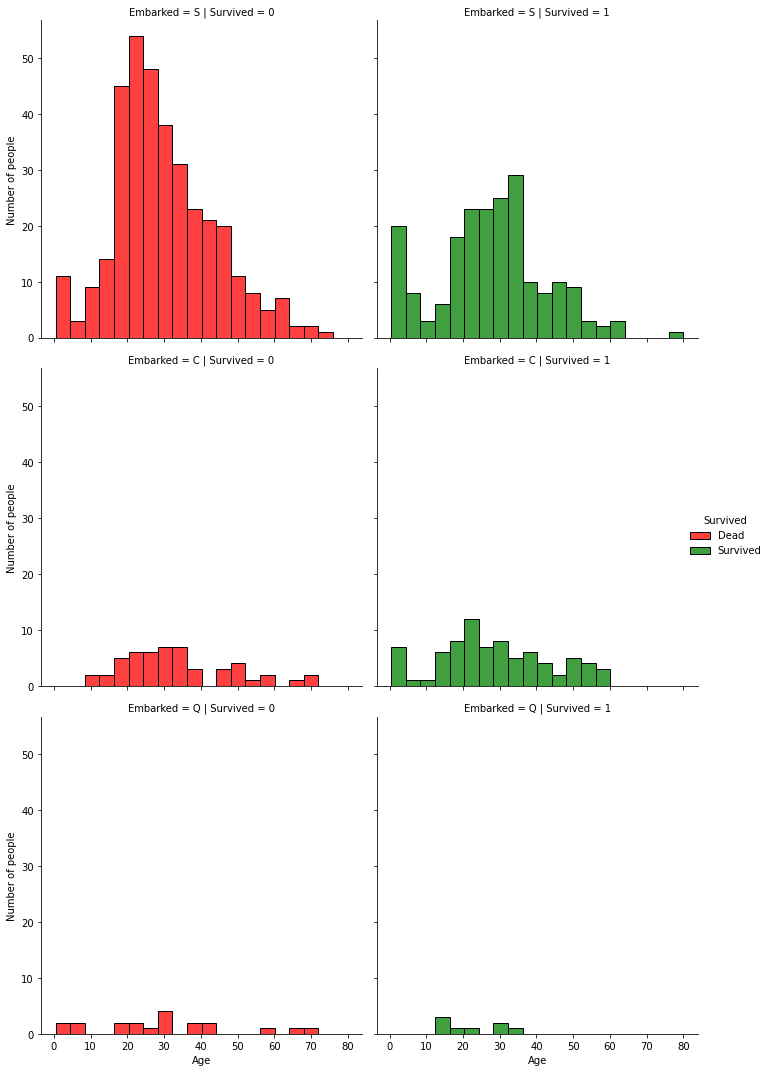

In [34]:
a=sns.displot(data=train, x="Age", hue='Survived', col="Survived", row='Embarked', bins=20, multiple="dodge", palette = ["red","green"])

ax = g.axes.flatten()
ax[0].set_title("Embarked S - Dead")
ax[1].set_title("Embarked S - Survived")
ax[2].set_title("Embarked C - Dead")
ax[3].set_title("Embarked C - Survived")
ax[4].set_title("Embarked Q - Dead")
ax[5].set_title("Embarked Q - Survived")

a.set_axis_labels("Age", "Number of people")

for t, l in zip(a._legend.texts, ['Dead','Survived']): t.set_text(l)

## Feature extraction

In [35]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
train['FamilySize'] = train['SibSp'] + train['Parch']

train.loc[train['FamilySize']>0,'Alone'] = 0
train.loc[train['FamilySize']==0,'Alone'] = 1

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0


Text(0.5, 1.0, 'Survival Rate by Family Size')

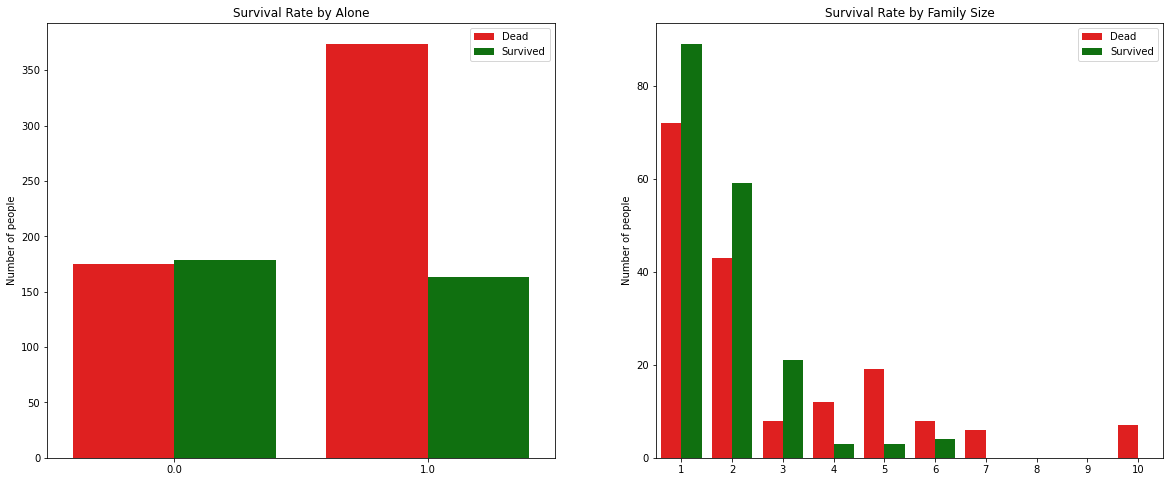

In [37]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.countplot(ax=ax[0], data=train, x="Alone", hue="Survived", palette = ["red","green"])
ax[0].set_ylabel('Number of people')
ax[0].set_xlabel("")
ax[0].legend(['Dead','Survived'], loc="upper right") 
ax[0].set_title('Survival Rate by Alone')

sns.countplot(ax=ax[1], data=train, x="FamilySize", hue="Survived", palette = ["red","green"], order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax[1].set_ylabel('Number of people')
ax[1].set_xlabel("")
ax[1].legend(['Dead','Survived'], loc="upper right") 
ax[1].set_title('Survival Rate by Family Size')

In [39]:

train['Title'] = train['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
print(train['Title'].value_counts(),"\n")

status_map={'Capt':'Military', 'Col':'Military', 'Major':'Military',
            'Don':'Noble', 'Dona':'Noble', 'Jonkheer':'Noble', 'Lady':'Noble', 'Sir':'Noble', 'Countess':'Noble',
            'Dr':'Dr',
            'Master':'Common', 'Miss':'Common', 'Mlle':'Common', 'Mme':'Common', 'Mr':'Common', 'Mrs':'Common', 'Ms':'Common',
            'Rev':'Clergy'
            }

train['SocialStatus'] = train['Title'].map(status_map)
print(train['SocialStatus'].value_counts())

train['Title'] = train['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
train['Title'] = train['Title'].replace(['Don', 'Dona', 'Rev', 'Dr', 'Major', 'Col', 'Capt', 'Jonkheer','Countess', 'Lady', 'Sir'], 'Special')

train.head()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Capt          1
Mme           1
Don           1
Ms            1
Sir           1
Lady          1
Countess      1
Name: Title, dtype: int64 

Common      868
Dr            7
Clergy        6
Military      5
Noble         5
Name: SocialStatus, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Title,SocialStatus
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,Mr,Common
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,Mrs,Common
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,Miss,Common
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,Mrs,Common
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0,Mr,Common


Text(0.5, 1.0, 'Survival Rate by Social Status')

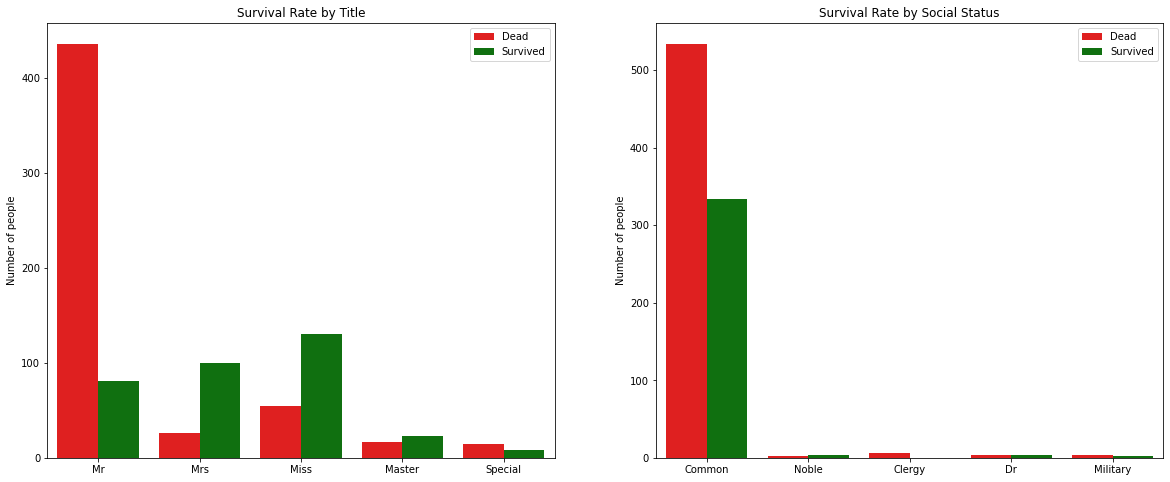

In [40]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.countplot(ax=ax[0], data=train, x="Title", hue="Survived", palette = ["red","green"])
ax[0].set_ylabel('Number of people')
ax[0].set_xlabel("")
ax[0].legend(['Dead','Survived'], loc="upper right") 
ax[0].set_title('Survival Rate by Title')

sns.countplot(ax=ax[1], data=train, x="SocialStatus", hue="Survived", palette = ["red","green"])
ax[1].set_ylabel('Number of people')
ax[1].set_xlabel("")
ax[1].legend(['Dead','Survived'], loc="upper right") 
ax[1].set_title('Survival Rate by Social Status')

In [41]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train['Embarked'] = train['Embarked'].fillna('S')

In [49]:
train.loc[train['Age']<=4,'Agegroup']=0 # Baby
train.loc[(train['Age']>4)&(train['Age']<=12),'Agegroup']=1 # Child
train.loc[(train['Age']>12)&(train['Age']<=19),'Agegroup']=2 # Teenager
train.loc[(train['Age']>19)&(train['Age']<=39),'Agegroup']=3 # Adult
train.loc[(train['Age']>39)&(train['Age']<=64),'Agegroup']=4 # Middle Age Adult
train.loc[train['Age']>64,'Agegroup']=5 # Senior
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Title,SocialStatus,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,Mr,Common,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,Mrs,Common,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,Miss,Common,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,Mrs,Common,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0,Mr,Common,3.0


Text(0.5, 1.0, 'Survival Rate by different agegroup')

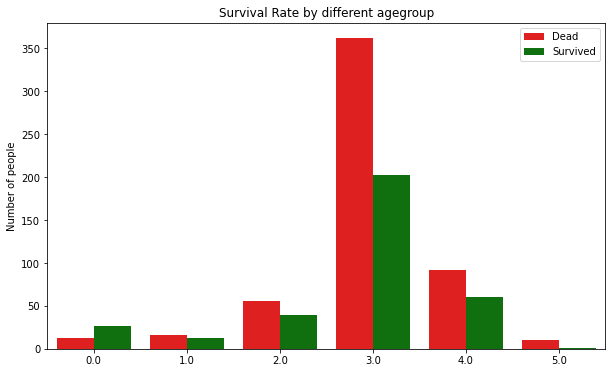

In [50]:
fig = plt.figure(figsize = (10,6))
ax=sns.countplot(data=train, x="Agegroup", hue="Survived", palette = ["red","green"])
ax.legend(['Dead','Survived'], loc="upper right")
ax.set_ylabel('Number of people')
ax.set_xlabel("")
ax.set_title('Survival Rate by different agegroup')

In [55]:
train.loc[~train['Cabin'].isnull(),'HasCabin'] = 1
train.loc[train['Cabin'].isnull(),'NoCabin'] = 1

train['Deck'] = train['Cabin'].str.replace('[0-9]','').str.split(' ', expand=True)[0]
train['RoomNumber'] = train['Cabin'].str.replace('[A-z]','').str.split(' ', expand=True)[0]

train[0:1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilySize,Alone,Title,SocialStatus,Agegroup,HasCabin,NoCabin,Deck,RoomNumber
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,S,1,0.0,Mr,Common,3.0,NaN,1.0,NaN,NaN


## cleaning

In [61]:
Y_train = train[['Survived']].copy()

params=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X_train = train[params].copy()
X_test = test[params].copy()

X_train['Set']='train'
X_test['Set']='test'
X_full = pd.concat([X_train, X_test])

In [62]:
X_full['Age'].replace(np.nan,X_full['Age'].median(), inplace=True)
X_full['Fare'].replace(np.nan,X_full['Fare'].median(), inplace=True)
X_full['Embarked'].replace(np.nan,X_full['Embarked'].value_counts().idxmax(), inplace=True)


In [63]:
X_full['Embarked'].replace(['S','C', 'Q'],[0, 1, 2],inplace=True)
X_full['Sex'].replace(['male','female'],[1,0],inplace=True)

/home/simple/anaconda3/envs/StriveSchool/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


<AxesSubplot:>

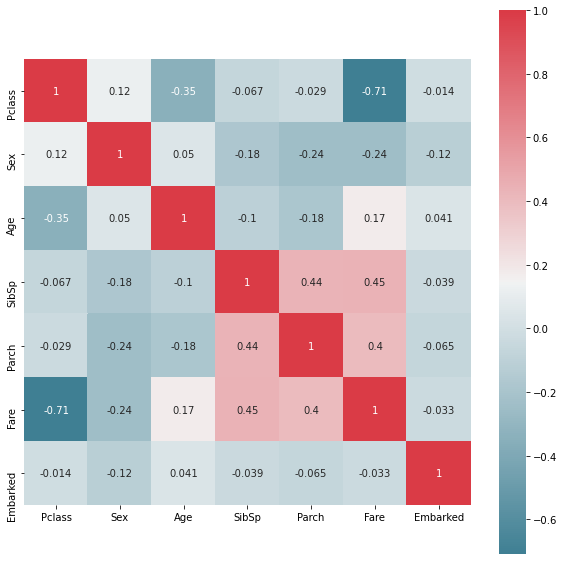

In [64]:
corr = X_full.corr(method = "spearman")
# corr = X_full.corr(method = "kendall")
# corr = X_full.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)

In [67]:
X_full.corrwith(train.Survived, axis=0, drop=False, method='pearson')

Pclass     -0.215333
Sex        -0.351432
Age        -0.045025
SibSp      -0.040575
Parch       0.004646
Fare        0.163144
Embarked    0.083921
dtype: float64

## model

In [71]:
X_train=X_full[X_full['Set']=='train'].copy()
X_test=X_full[X_full['Set']=='test'].copy()

X_train.drop(columns=['Set'], inplace=True)
X_test.drop(columns=['Set'], inplace=True)

In [72]:
scale=StandardScaler().fit(X_train)
X_train_sc = scale.transform(X_train)
X_test_sc = scale.transform(X_test)

models=[LogisticRegression(),
        RandomForestClassifier(),
        SVC(),
        DecisionTreeClassifier(),
        KNeighborsClassifier()]

for model in models:
    results = cross_validate(model, X_train_sc, Y_train.values.ravel(), cv=10)
    r2 = results['test_score'].mean()
    m = str(model)
    print(f'r2 for \x1b[94m{m[:m.index("(")]}\x1b[0m = \x1b[95m{r2:.4f}\x1b[0m')




r2 for LogisticRegression = 0.7946
r2 for RandomForestClassifier = 0.8104
r2 for SVC = 0.8249
r2 for DecisionTreeClassifier = 0.7868
r2 for KNeighborsClassifier = 0.8126


In [73]:
# Logistic Regression
param_lr={'penalty':['l1','l2'],
         'C' : [0.01,0.1,1,10,50,100,200,300],
         'solver':['liblinear', 'saga']}

gs_lr = GridSearchCV(LogisticRegression(),param_grid = param_lr, scoring="accuracy",n_jobs=-1)
gs_lr.fit(X_train_sc,Y_train.values.ravel())
best_lr=gs_lr.best_estimator_
print(best_lr)
print('score=',gs_lr.best_score_)

LogisticRegression(C=0.01, solver='saga')
score= 0.8036030381018142


In [74]:
# Random Forest
param_rf={'max_features': [1, 2, 3, 5, 10],
          'min_samples_split': [2, 3, 5, 7, 10],
          'min_samples_leaf': [1, 3, 5, 7, 10],
          'bootstrap': [False],
          'n_estimators' :[100, 200, 300]}

gs_rf = GridSearchCV(RandomForestClassifier(), param_grid = param_rf, scoring="accuracy", n_jobs=-1)
gs_rf.fit(X_train_sc, Y_train.values.ravel())
best_rf=gs_rf.best_estimator_
print(best_rf)
print('score=',gs_rf.best_score_)

KeyboardInterrupt: 

In [ ]:
# Decision Tree
param_dt={'max_features': [1, 2, 3, 5, 6, 7, 8, 9, 10, 15],
          'min_samples_split': [2, 3, 4, 5, 6, 7, 10, 15],
          'min_samples_leaf': [1, 2, 3, 5, 6, 7, 8, 10, 15],
          'splitter':['best']}

gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid = param_dt, scoring="accuracy", n_jobs=-1)
gs_dt.fit(X_train_sc, Y_train.values.ravel())
best_dt=gs_dt.best_estimator_
print(best_dt)
print('score=',gs_dt.best_score_)

In [ ]:
# Support Vector Machine
param_sv={'probability':[True],
          'gamma': [ 0.001, 0.01, 0.1, 1],
          'C': [1, 10, 50, 100, 200, 300, 1000]}

gs_sv = GridSearchCV(SVC(),param_grid = param_sv, scoring="accuracy",n_jobs=-1)
gs_sv.fit(X_train_sc,Y_train.values.ravel())
best_sv=gs_sv.best_estimator_
print(best_sv)
print('score=',gs_sv.best_score_)

In [ ]:
# KNN
param_kn={'n_neighbors':[1,2,3,5,7,10,14,15]}

gs_kn = GridSearchCV(KNeighborsClassifier(), param_grid = param_kn, scoring="accuracy", n_jobs=-1)
gs_kn.fit(X_train_sc,Y_train.values.ravel())
best_kn=gs_kn.best_estimator_
print(best_kn)
print('score=',gs_kn.best_score_)
from sklearn.ensemble import VotingClassifier

vote = VotingClassifier(estimators=[('lr',best_lr),
                                    ('rfc', best_rf),
                                    ('svc',best_sv),
                                    ('dtc',best_dt),
                                    ('knc',best_kn)
                                   ],voting='soft', n_jobs=-1)

vote = vote.fit(X_train_sc, Y_train.values.ravel())
vote


In [ ]:
#predict
Y_predict = vote.predict(X_test_sc)
test['Survived'] = Y_predict
test.set_index('PassengerId', inplace=True)
test[['Survived']].to_csv('result.csv')


In [ ]:
##tensorflow

x_train, x_val, y_train, y_val = train_test_split(X_train_sc, Y_train, test_size=0.2, random_state=0)
model = Sequential()
model.add(Dense(100, input_shape=(x_train.shape[1],), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(20, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation = 'tanh'))
model.add(BatchNormalization())
model.add(Dense(500, activation = 'gelu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50)
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()
ModelLoss, ModelAccuracy = model.evaluate(x_val, y_val)

print(f'Test Loss is {ModelLoss}')
print(f'Test Accuracy is {ModelAccuracy}')

In [ ]:
y_pred = model.predict(x_val)
y_test_list = list(y_val['Survived'])
total = len(y_test_list)
correct = 0
val = 0
result = []
count = np.arange(0, 1, 0.01)

for n in count:
    for i in range(total):
        if(y_pred[i][0]<n):
            val=0
        else:
            val=1

        if(val==y_test_list[i]):
            correct+=1
          
    result.append(correct/total)
    correct=0

print(f"Max value: {result[result.index(max(result))]:.5f} at {count[result.index(max(result))]}")
Y_predict = model.predict(X_test_sc)
pred=[]

for i in range(len(Y_predict)):
    if Y_predict[i] >= 0.5:
        pred.append(1)
    else:
        pred.append(0)

output = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': pred})
output.to_csv('submission.csv', index=False)
